In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import xlrd

filename = "2010_sample_values.xlsx"
peoes = "30 Dias_Peões.xlsx"
acidentes = "30 Dias_Acidentes.xlsx"
passag = "30 Dias_Passag.xlsx"
cond_veic = "30 Dias_Cond_Veic.xlsx"

def read_file():
    xlsx = pd.ExcelFile(filename)
    for sheet_name in xlsx.sheet_names:
        appended_data=[]
        df = pd.read_excel(filename,sheet_name=sheet_name)
        appended_data.append(df)
        appended_data = pd.concat(appended_data)
        appended_data.to_excel(sheet_name+'.xlsx')

def open_sheet(sheet_name):
    return pd.read_excel(sheet_name)

def getSample():
    df=open_sheet("mergedFiles.xlsx")
    df = df.drop(df.columns[[0]], axis=1)
    df.sample(n = 10000)

def get1000OfExcell(name):
    df=open_sheet(name)
    #df = df.drop(df.columns[[0]], axis=1)
    return df.sample(n = 1000)


def concatenateAll():
    a2010=get1000OfExcell("2010Acidentes.xlsx")
    a2011=get1000OfExcell("2011Acidentes.xlsx")
    a2012=get1000OfExcell("2012Acidentes.xlsx")
    a2013=get1000OfExcell("2013Acidentes.xlsx")
    a2014=get1000OfExcell("2014Acidentes.xlsx")
    a2015=get1000OfExcell("2015Acidentes.xlsx")
    a2016=get1000OfExcell("2016Acidentes.xlsx")
    a2017=get1000OfExcell("2017Acidentes.xlsx")
    a2018=get1000OfExcell("2018Acidentes.xlsx")
    a2019=get1000OfExcell("2019Acidentes.xlsx")
    frames = [a2010, a2011, a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019]
    result = pd.concat(frames)
    result.to_excel("pedro_10000.xlsx")
    print(result)



In [6]:
concatenateAll()

       Id. Acidente             Datahora        Dia        Mês  \
14525    2010468428  2010:06:09 14:00:00 1900-01-09 1900-06-01   
23002    2010474545  2010:09:02 12:10:00 1900-01-02 1900-09-01   
4048     2010434953  2010:02:15 13:40:00 1900-01-15 1900-02-01   
13430    2010463406  2010:05:29 20:10:00 1900-01-29 1900-05-01   
16243    2011501994  2010:06:28 08:45:00 1900-01-28 1900-06-01   
...             ...                  ...        ...        ...   
22270   20191756734  2019:08:22 17:20:00 1900-01-22 1900-08-01   
11429   20191734433  2019:05:08 13:45:00 1900-01-08 1900-05-01   
18014   20191769457  2019:07:14 12:15:00 1900-01-14 1900-07-01   
3461    20191661496  2019:02:08 17:55:00 1900-01-08 1900-02-01   
7485    20191669277  2019:03:25 19:30:00 1900-01-25 1900-03-01   

                     Hora      Entidades Fiscalizadoras  Velocidade local  \
14525 1900-01-01 14:00:00   Guarda Nacional Republicana              40.0   
23002 1900-01-01 12:10:00  Polícia de Segurança Públi

In [47]:
# 30 Dias_Acidentes

features_para_remover = ["Id. Acidente","Dia","Mês","Hora","Entidades Fiscalizadoras","Latitude GPS",
                         "Longitude GPS","Concelho","Freguesia","Pov. Proxima","Nome arruamento",
                         "Cod Via","Km","Natureza"]
df_peoes = None
#Stor disse que concelho e freguesia podia ser interessante se focassemos so num 1.
def remover_featuresA():
    df = open_sheet(acidentes)
    df = df.drop(df.columns[[0]], axis=1)
    for f in features_para_remover:
        del df[f]
    df.to_excel("pedro_acidentes.xlsx")

def open_teste_acidentes():
    global df_peoes
    df_peoes = open_sheet("pedro_acidentes.xlsx")
    df_peoes = df_peoes.drop(df_peoes.columns[[0]], axis=1)

def see_atmosferic_factors():
    fatores=df_peoes["Factores Atmosféricos"].unique()
    print(fatores)
    listas=createLists(len(fatores))
    allFatores=df_peoes["Factores Atmosféricos"]
    for inAll in allFatores:
        for f in range(len(fatores)):
            if fatores[f]==inAll:
                listas[f].append(inAll)
    #print(listas)
    fig = plt.figure(figsize = (20,20))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(fatores,listas)
    #ax.set_title(feature)
    plt.show()
#discretizar os mortos
#curva e recta para 0 e 1
#seasonal cond aderencia , fatores atmosfericos,
#dividir a data e hora em colunas diferentes????
def createLists(label):
    list_of_lists = []
    for i in range(label):
        list_of_lists.append([])
    return list_of_lists


In [48]:
#remover_featuresA()
open_teste_acidentes()

['Chuva' 'Neve' 'Bom tempo' 'NÃO DEFINIDO' 'Nevoeiro' 'Vento Forte'
 'Granizo' 'Nuvem de fumo']


c:\users\pedro\miniconda3\lib\site-packages\numpy\lib\stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U5')) -> None

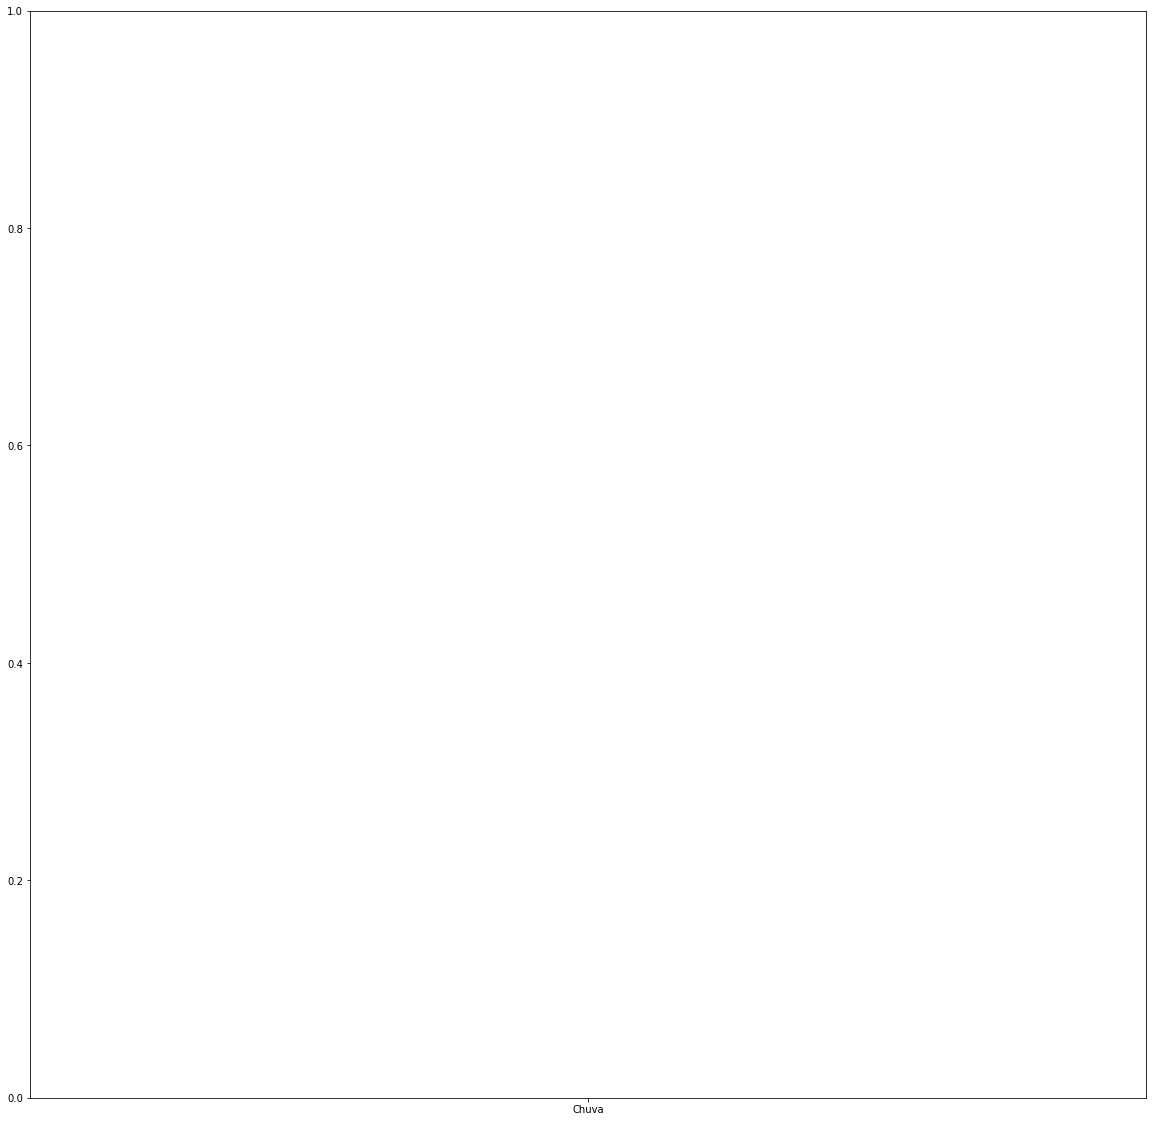

In [49]:
see_atmosferic_factors()

In [3]:
# 30 Dias_Peoes

features_para_remover = ["Id. Acidente","Freguesia","Entidades Fiscalizadoras","Id. Peao","Concelho","Natureza"]
df_peoes = None

def remover_features():
    df = open_sheet(peoes)
    df = df.drop(df.columns[[0]], axis=1)
    for f in features_para_remover:
        del df[f]
    df.to_excel("cosme_peoes.xlsx")

def open_teste_peoes():
    global df_peoes
    df_peoes = open_sheet("cosme_peoes.xlsx")
    df_peoes = df_peoes.drop(df_peoes.columns[[0]], axis=1)

def get_tuple_by_val(list_result,val):
    number_val = 0
    total = 0
    for r in list_result:
        if r[0] == val:
            number_val =  r[1]
        total+=r[1]
    return number_val/total

def sort_results_por_valor(results,val):
    sorted_res = []
    for r in results:
        sorted_res.append((r[0],get_tuple_by_val(r[1],val)))
    sorted_res.sort(key = lambda x: x[1])
    return sorted_res

def plot_tipoNatureza_por_distrito():
    distritos = df_peoes["Distrito"].unique()
    result=[]
    for d in distritos:
        temp=[]
        d_df = df_peoes[df_peoes["Distrito"] == d]
        d_tiposNatureza = d_df["Tipo Natureza"].unique()
        for t in d_tiposNatureza:
            t_d_df = d_df[d_df["Tipo Natureza"] == t]
            temp.append((t,t_d_df.shape[0]))
        result.append((d,temp))

    list_atropelamento = sort_results_por_valor(result,"Atropelamento")
    list_colisao = sort_results_por_valor(result,"Colisão")
    list_despiste = sort_results_por_valor(result,"Despiste")

    for r in result:
        print("\n"+str(r[0]))
        print(r[1])

    print("\nAtropelamento: ")
    print(list_atropelamento)
    print("\nColisão: ")
    print(list_colisao)
    print("\nDespiste: ")
    print(list_despiste)


def plot_distribution_feature(feature,size_boolean):
    feature_values = df_peoes[feature].unique()
    x_values = []
    y_values = []
    for f_val in feature_values:
        f_val_df = df_peoes[df_peoes[feature] == f_val]
        x_values.append(f_val)
        y_values.append(f_val_df.shape[0])
    if size_boolean:
        fig = plt.figure(figsize = (30,5))
    else:
        fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x_values,y_values)
    ax.set_title(feature)
    plt.show()

def plot_distributions():
    features = ["Tipo Natureza", "Acções Peão", "Distrito","Lesões a 30 dias","Sexo"]

    plot_distribution_feature(features[0],False)
    plot_distribution_feature(features[1],True)
    plot_distribution_feature(features[2],True)
    plot_distribution_feature(features[3],False)
    plot_distribution_feature(features[4],False)


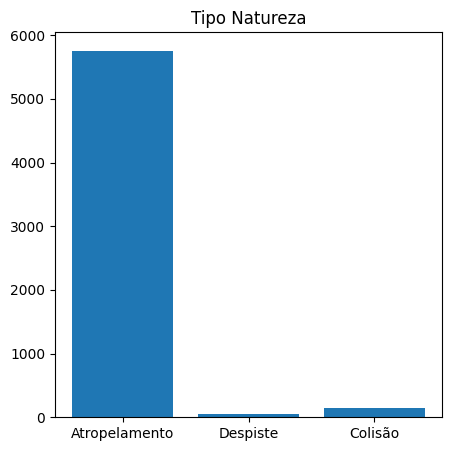

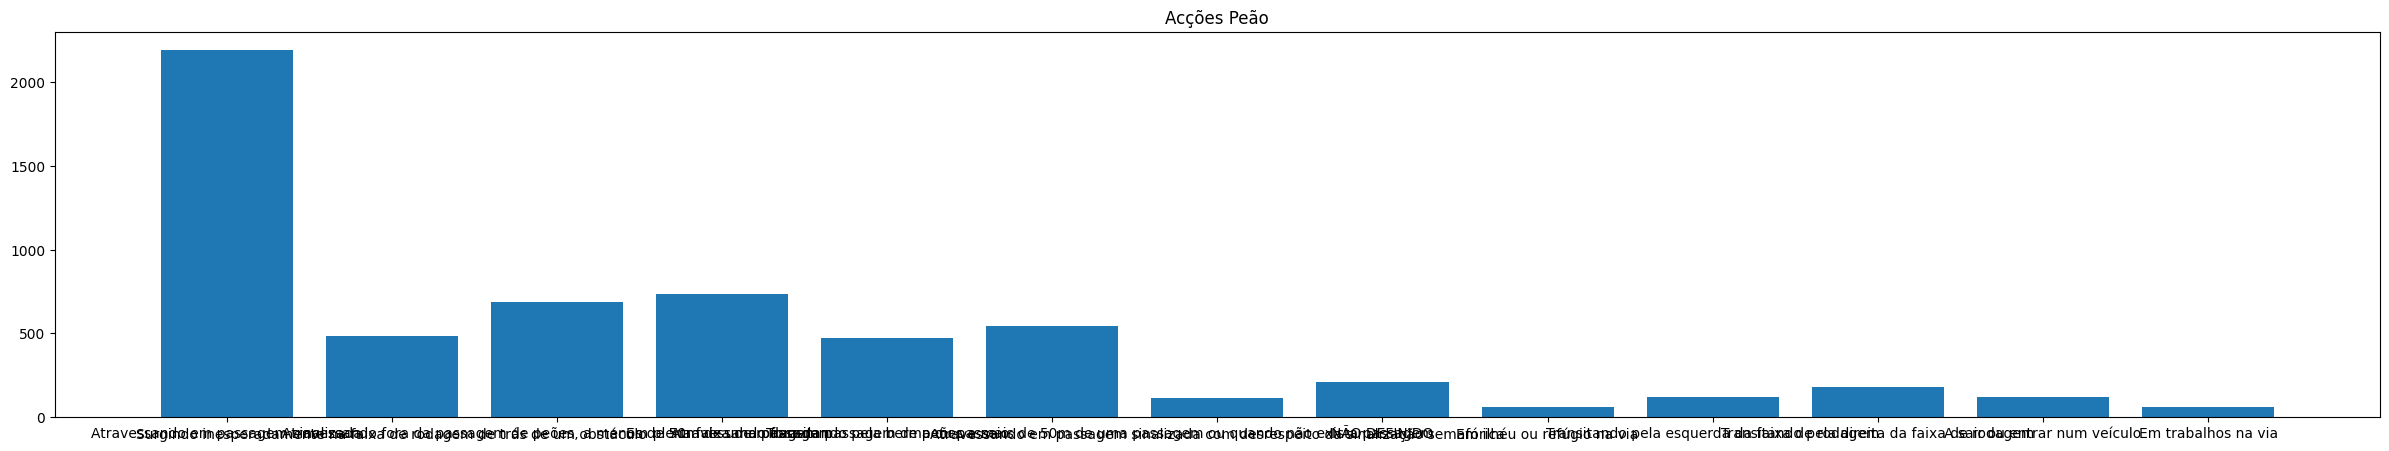

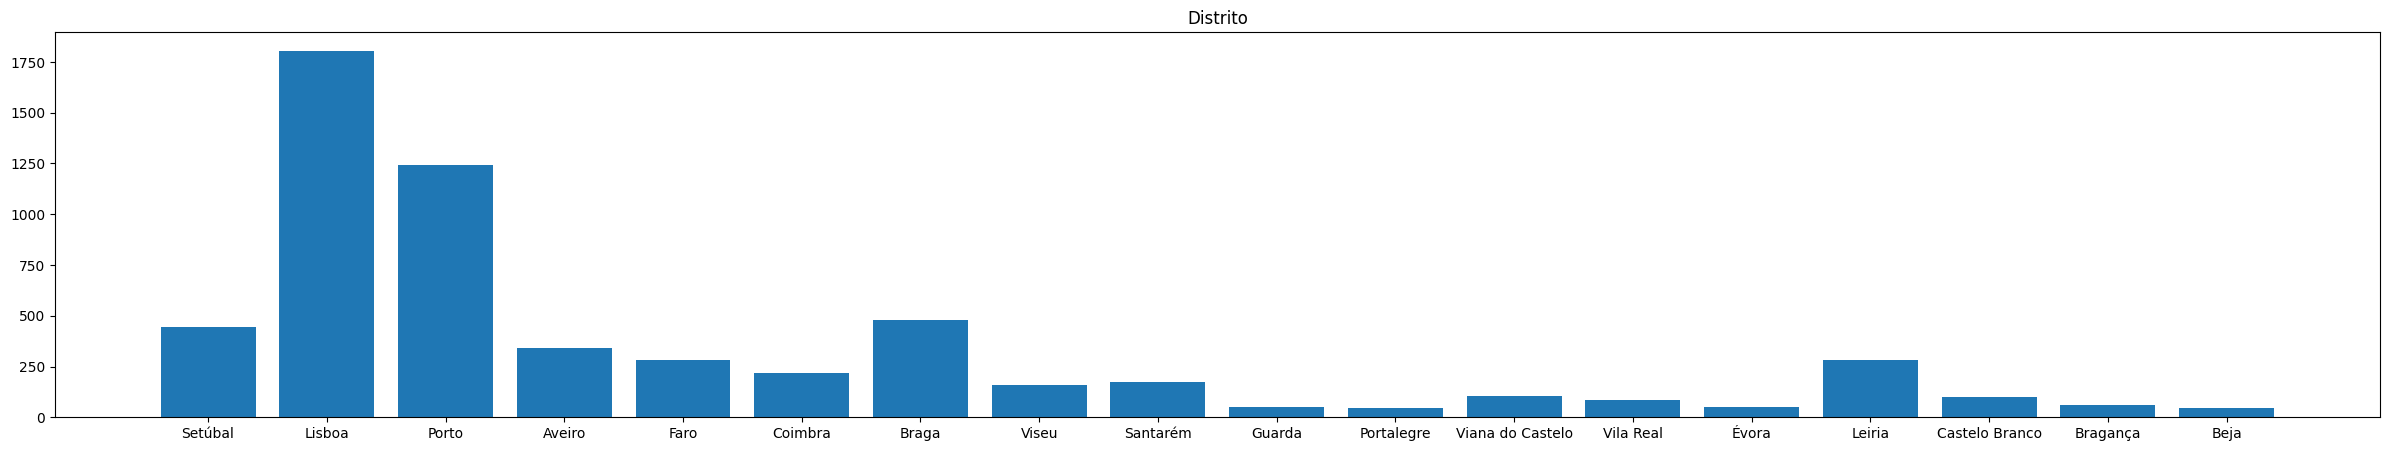

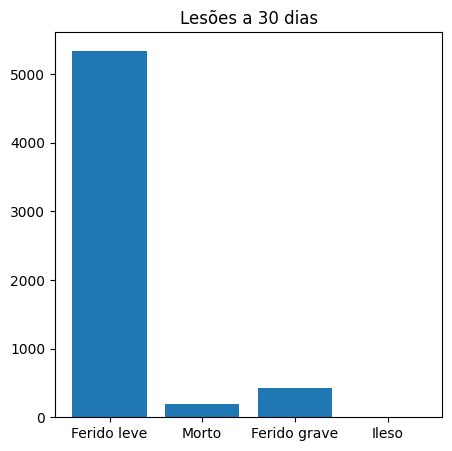

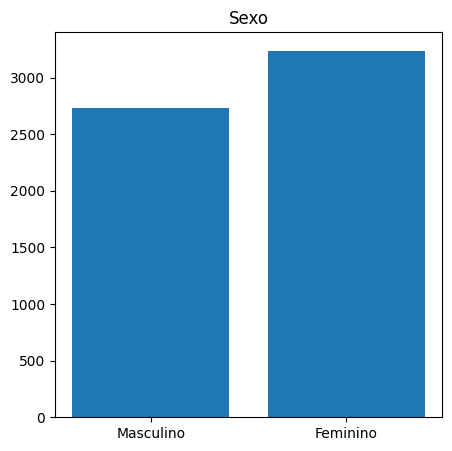

,Tipo Natureza,Datahora,Sexo,Acções Peão,Distrito,Lesões a 30 dias,Peao Gr.Etario(<=5) SUM,Peao Gr.Etario(6-9) SUM,Peao Gr.Etario(10-14) SUM,Peao Gr.Etario(15-17) SUM,...,Peao Gr.Etario(35-39) SUM,Peao Gr.Etario(40-44) SUM,Peao Gr.Etario(45-49) SUM,Peao Gr.Etario (50-54) SUM,Peao Gr.Etario (55-59) SUM,Peao Gr.Etario (60-64) SUM,Peao Gr.Etario (65-69) SUM,Peao Gr.Etario (70-74) SUM,Peao Gr.Etario (>=75) SUM,Peao Gr.Etario(Não Def.) SUM
0,Atropelamento,2010:03:03 18:30:00,Masculino,Atravessando em passagem sinalizada,Setúbal,Ferido leve,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Atropelamento,2010:02:01 07:27:00,Feminino,Atravessando em passagem sinalizada,Lisboa,Morto,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Atropelamento,2010:01:18 18:45:00,Feminino,Atravessando em passagem sinalizada,Lisboa,Ferido leve,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Atropelamento,2010:02:15 06:30:00,Feminino,Surgindo inesperadamente na faixa de rodagem d...,Lisboa,Ferido leve,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Atropelamento,2010:01:23 13:40:00,Masculino,"Atravessando fora da passagem de peões, a meno...",Lisboa,Ferido leve,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963,Atropelamento,2010:09:22 00:30:00,Masculino,Em plena faixa de rodagem,Coimbra,Ferido leve,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5964,Atropelamento,2010:10:29 19:00:00,Feminino,Atravessando fora da passagem de peões a mais ...,Porto,Ferido grave,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5965,Atropelamento,2010:12:25 23:40:00,Masculino,Em plena faixa de rodagem,Lisboa,Ferido leve,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5966,Atropelamento,2010:01:06 07:25:00,Feminino,Atravessando em passagem sinalizada,Setúbal,Ferido leve,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
remover_features()
open_teste_peoes()
# plot_tipoNatureza_por_distrito()
# print(df_peoes.info())
plot_distributions()
df_peoes